## Simple moving average, Cumulative moving average, Exponential weight moving average

In [6]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt 

In [3]:
df_tesla=pdr.get_data_yahoo("TSLA")
df_tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001
2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999
2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001
2017-03-09,49.731998,48.599998,49.526001,48.980000,19396500.0,48.980000
2017-03-10,49.299999,48.599998,49.242001,48.737999,15331500.0,48.737999
...,...,...,...,...,...,...
2022-02-28,876.859985,814.710022,815.010010,870.429993,33002300.0,870.429993
2022-03-01,889.880005,853.780029,869.679993,864.369995,24922300.0,864.369995
2022-03-02,886.479980,844.270020,872.130005,879.890015,24881100.0,879.890015


In [33]:
df_tesla.to_csv("Tesla_stocks_data.csv")

## Simple moving average

### It is use to smoothing the zif zag curves. It is calculated by taking a window size and taking avaerage of that number of rows of a particular column. for eg: If window size is 5, then first 5 rows (1 - 5) of a column will be considered for average, then we will start from second element (2-6) will be considered for the average, then 3-7 then 4-8 and so on. Min periods is the number which decided how many averaging value should be shown as Nan, By default the size equivallent to window size is Nan.

<AxesSubplot:xlabel='Date'>

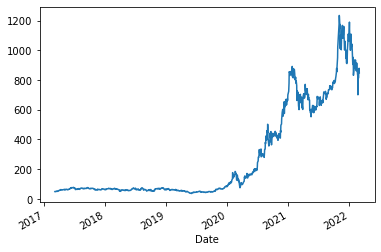

In [8]:
df_tesla["Open"].plot()

In [23]:
df_tesla["Open:10 days"]=df_tesla["Open"].rolling(window=10, min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

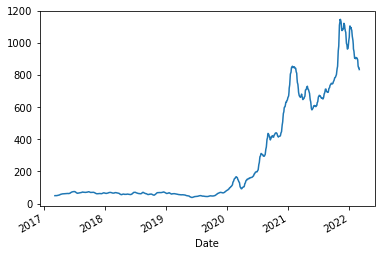

In [24]:
df_tesla["Open:10 days"].plot()

<AxesSubplot:xlabel='Date'>

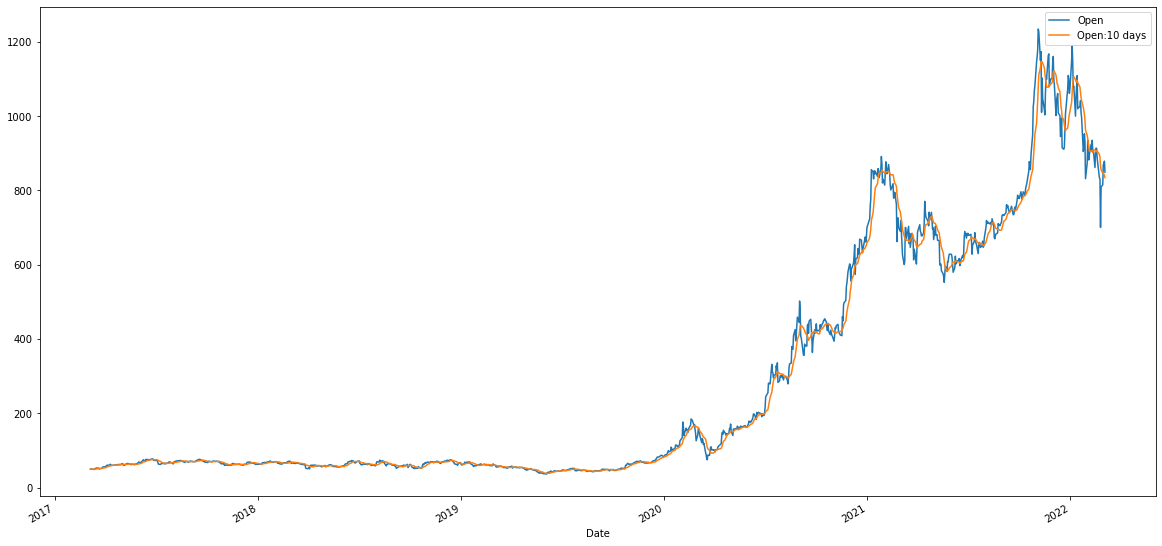

In [25]:
df_tesla[["Open","Open:10 days"]].plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

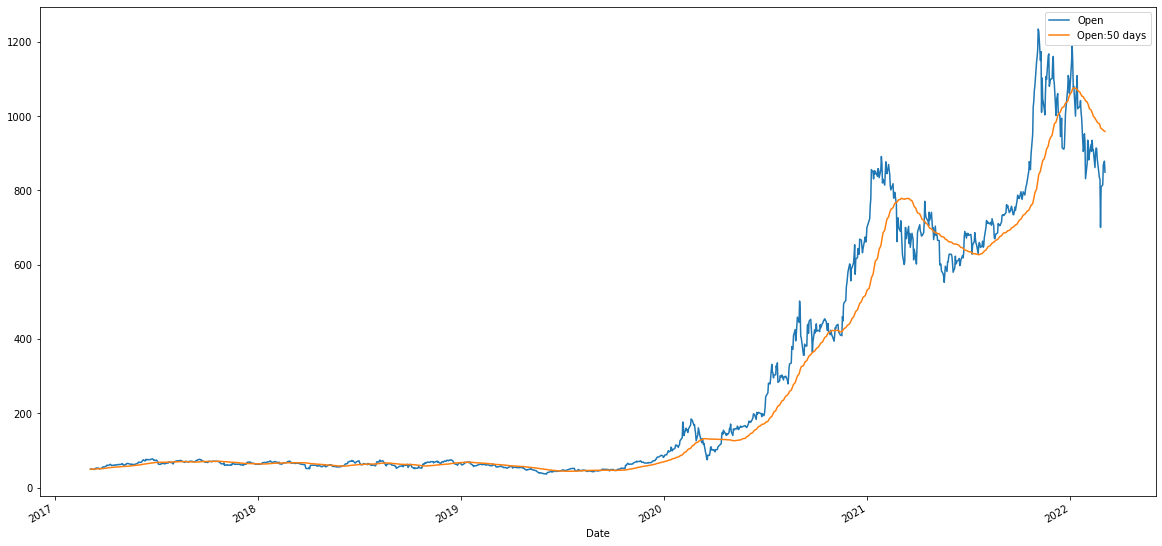

In [26]:
df_tesla["Open:50 days"]=df_tesla["Open"].rolling(window=50, min_periods=1).mean()
df_tesla[["Open","Open:50 days"]].plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

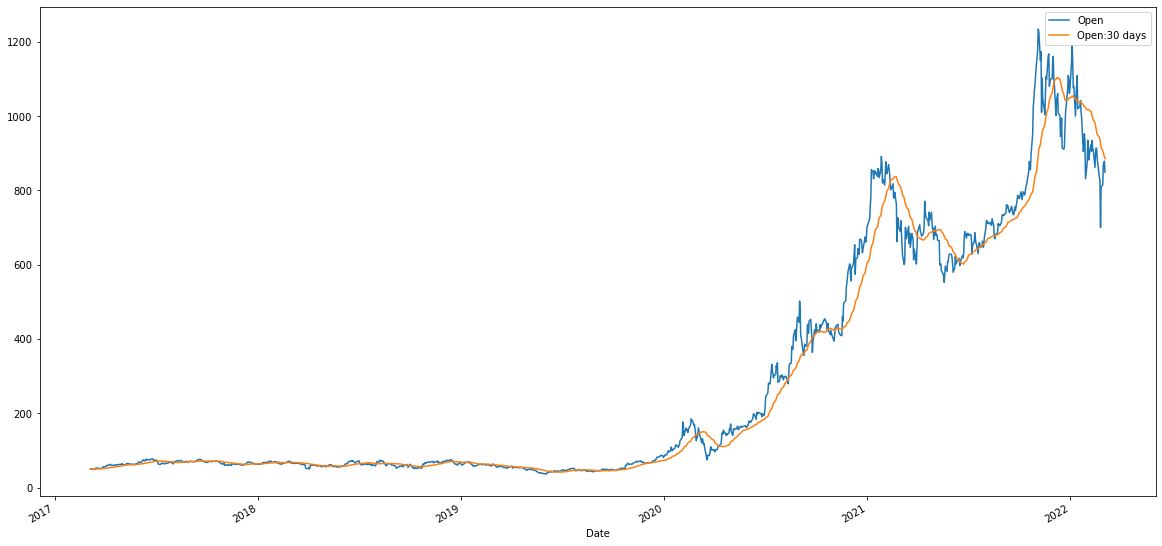

In [27]:
df_tesla["Open:30 days"]=df_tesla["Open"].rolling(window=30, min_periods=1).mean()
df_tesla[["Open","Open:30 days"]].plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

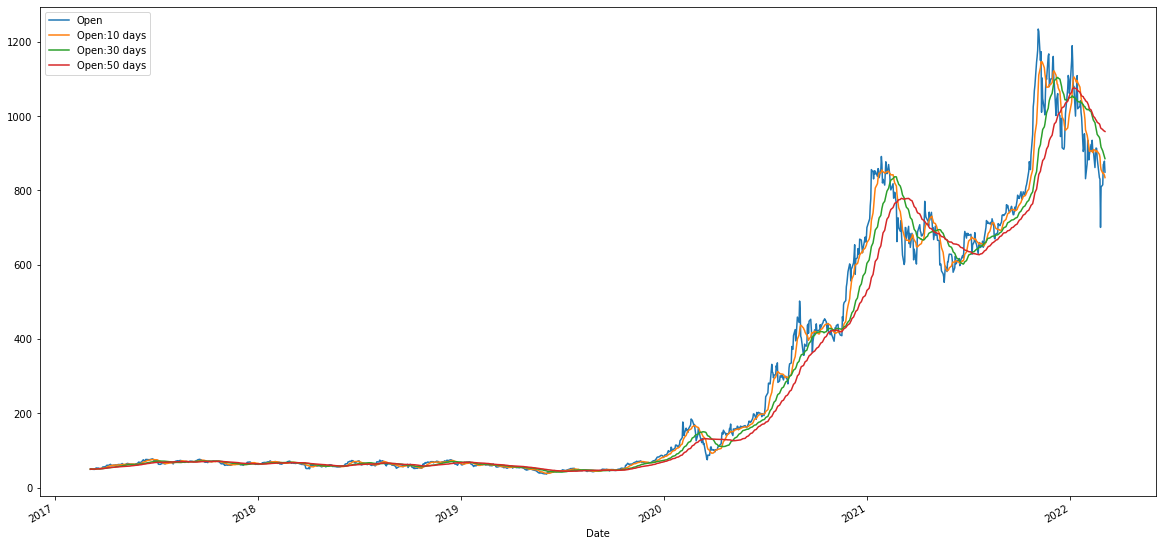

In [28]:
df_tesla[["Open","Open:10 days","Open:30 days","Open:50 days"]].plot(figsize=(20,10))

## Disadvantages of the simple moving average
### It gives importance to all the data equally since, it is averaging. But sometimes we may want recent data to be given more weight.

## Cumulative moving average

### Here, we take average of first element then first two elements, then first 3m then first 4, then first 5 and so on.

<AxesSubplot:xlabel='Date'>

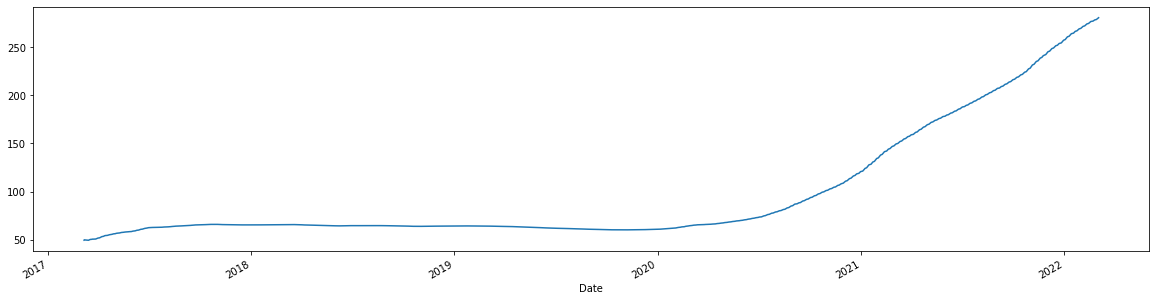

In [31]:
df_tesla['Open'].expanding().mean().plot(figsize=(20,5))

## Exponential moving average

### The EWM is calculated witht formula--> EMA = Closing price x multiplier + EMA (previous day) x (1-multiplier) where closing price can be any column, multiplier is defined as [2/(window size +1)], for EMA of previous day in case of first EMA we calculate SMA for the first time.

#### Try with this formula on csv files

In [35]:
## Let's calculate EMA with pandas for open

df_tesla['EMA_0.1']=df_tesla['Open'].ewm(alpha=0.1, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

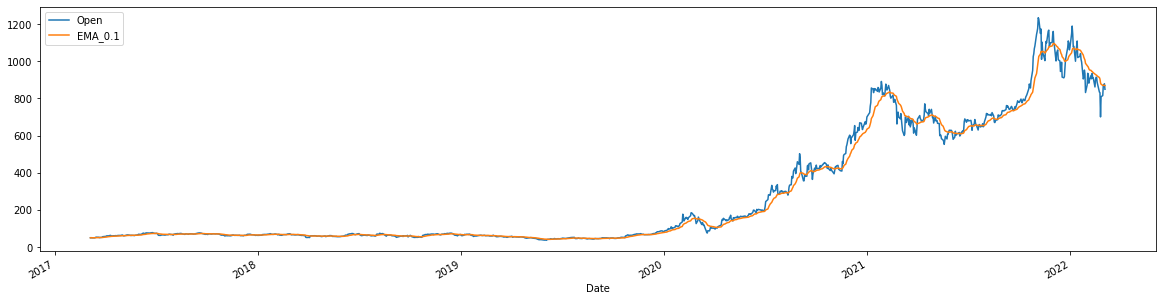

In [38]:
df_tesla[['Open','EMA_0.1']].plot(figsize=(20,5))

In [43]:
df_tesla['EMA_0.3']=df_tesla['Open'].ewm(alpha=0.3, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

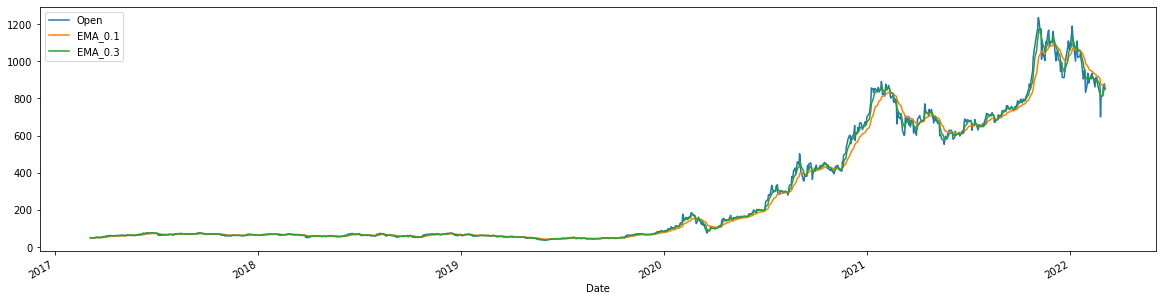

In [44]:
df_tesla[['Open','EMA_0.1','EMA_0.3']].plot(figsize=(20,5))

In [45]:
df_tesla['EMA_0.5']=df_tesla['Open'].ewm(alpha=0.5, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

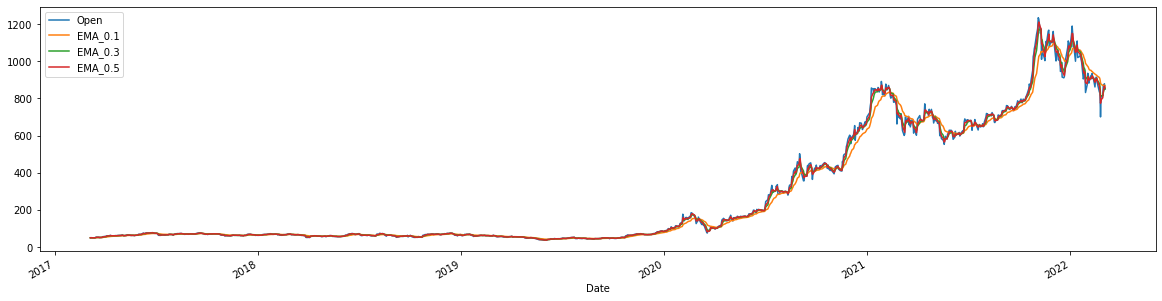

In [46]:
df_tesla[['Open','EMA_0.1','EMA_0.3','EMA_0.5']].plot(figsize=(20,5))

## EWMA--> Exponential weighted moving average
#### An exponential moving average (EMA) is a type of moving average (MA) that places a greater weight and significance on the most recent data points. The exponential moving average is also referred to as the exponentially weighted moving average. An exponentially weighted moving average reacts more significantly to recent price changes than a simple moving average (SMA), which applies an equal weight to all observations in the period.

In [48]:
## Eg
df_tesla["EMA_5days"]=df_tesla["Open"].ewm(span=5).mean()

<AxesSubplot:xlabel='Date'>

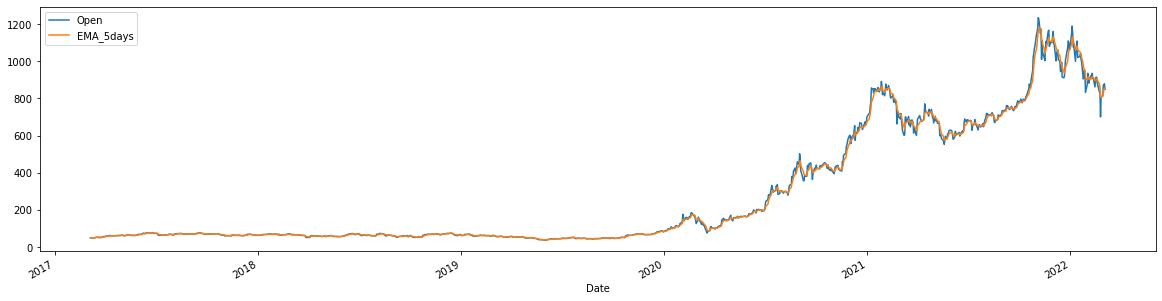

In [49]:
df_tesla[['Open','EMA_5days']].plot(figsize=(20,5))

In [50]:
## Plotting EWMA, EMA, SMA, CMA together
df_tesla

,High,Low,Open,Close,Volume,Adj Close,Open:10 days,Open:50 days,Open:30 days,EMA_0.1,EMA_0.3,EMA_0.5,EMA_5days
Date,,,,,,,,,,,,,
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001,49.582001,49.582001,49.582001,49.582001,49.582001,49.582001,49.582001
2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999,49.983000,49.983000,49.983000,49.662201,49.822600,49.983000,50.063200
2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001,49.788667,49.788667,49.788667,49.635981,49.695821,49.691501,49.749053
2017-03-09,49.731998,48.599998,49.526001,48.980000,19396500.0,48.980000,49.723001,49.723001,49.723001,49.624983,49.644875,49.608751,49.656401
2017-03-10,49.299999,48.599998,49.242001,48.737999,15331500.0,48.737999,49.626801,49.626801,49.626801,49.586684,49.524012,49.425376,49.497318
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,876.859985,814.710022,815.010010,870.429993,33002300.0,870.429993,846.407001,964.021399,906.409666,870.151369,814.199518,803.368923,810.652837
2022-03-01,889.880005,853.780029,869.679993,864.369995,24922300.0,864.369995,847.217999,961.524999,901.402999,870.104232,830.843661,836.524458,830.328555
2022-03-02,886.479980,844.270020,872.130005,879.890015,24881100.0,879.890015,844.431000,960.672198,896.253666,870.306809,843.229564,854.327231,844.262372


<AxesSubplot:xlabel='Date'>

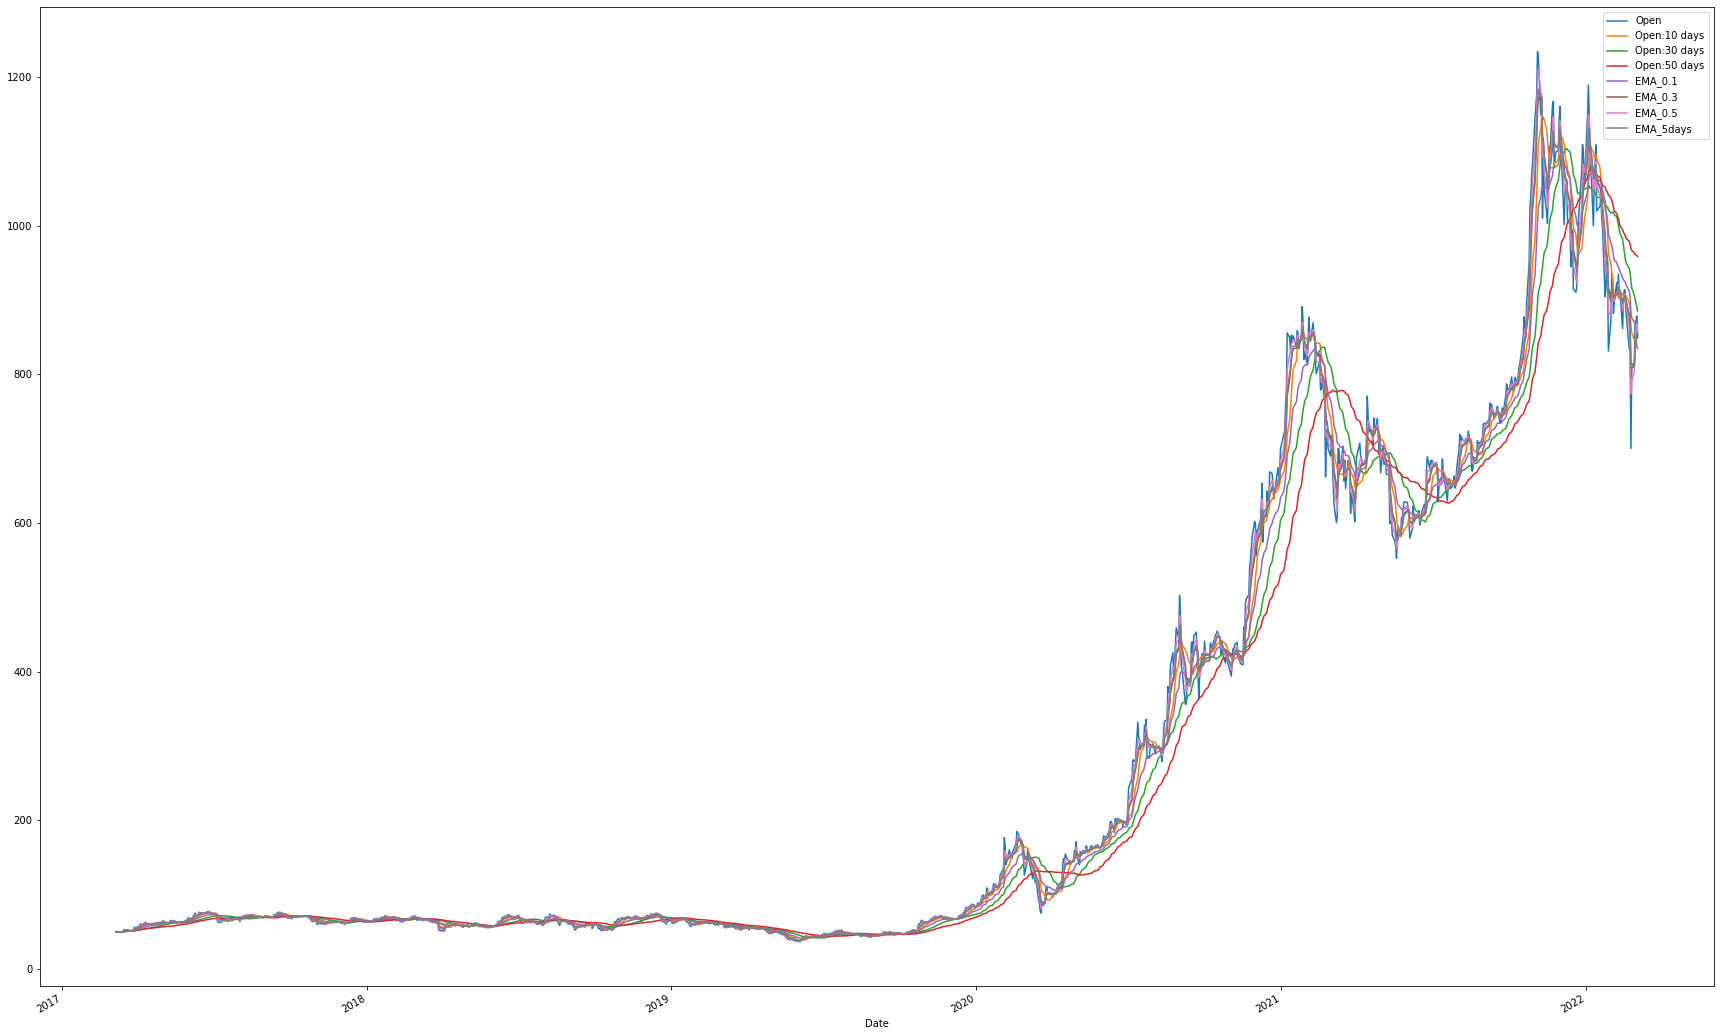

In [54]:
df_tesla[['Open','Open:10 days','Open:30 days','Open:50 days','EMA_0.1','EMA_0.3','EMA_0.5','EMA_5days']].plot(figsize=(30,20))